## Name: Aryan Mahesh Patil   
### RollNo: 51
#### Exp: 4              Date: 09|02|2026

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier

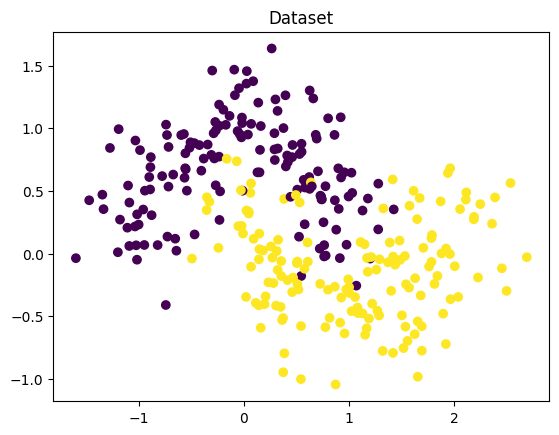

In [8]:
x, y = make_moons(n_samples=300, noise=0.25, random_state=42)
plt.scatter(x[:,0],x[:,1], c=y)
plt.title("Dataset")
plt.show()

In [9]:
X_train, X_test, Y_train, Y_test= train_test_split(
    x, y, test_size=0.3, random_state=0
)

In [11]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [21]:
lr=LogisticRegression()
lr.fit(X_train_scaled, Y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression")
print("Accuracy:",accuracy_score(Y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.8777777777777778
Confusion Matrix:
 [[34  5]
 [ 6 45]]


In [22]:
dt=DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print("Accuracy:",accuracy_score(Y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_dt))

Decision Tree
Accuracy: 0.8888888888888888
Confusion Matrix:
 [[37  2]
 [ 8 43]]


In [46]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

print("KNN")
print("Accuracy:",accuracy_score(Y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_knn))

KNN
Accuracy: 0.9111111111111111
Confusion Matrix:
 [[38  1]
 [ 7 44]]


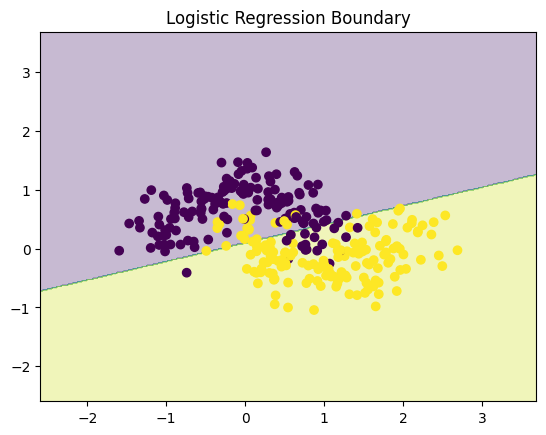

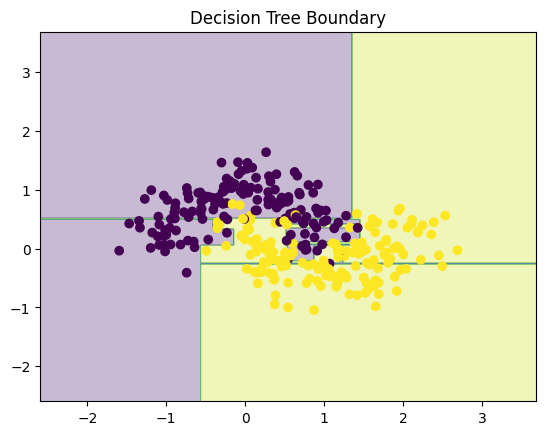

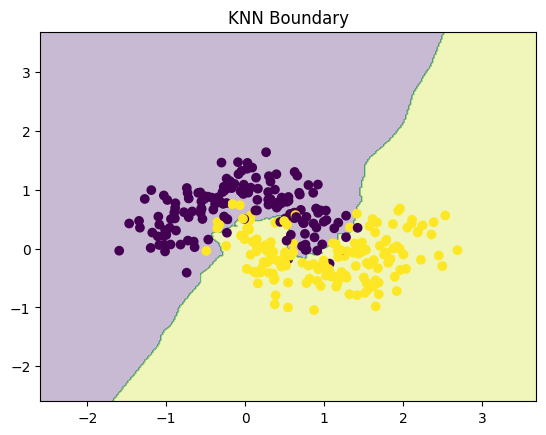

In [48]:
def plot_boundary(model,scaled,title):
    h=0.02
    x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max=x[:,0].min()-1,x[:,0].max()+1

    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                    np.arange(y_min,y_max,h))

    grid=np.c_[xx.ravel(),yy.ravel()]
    if scaled:
        grid=scaler.transform(grid)
    z=model.predict(grid)
    z=z.reshape(xx.shape)

    plt.contourf(xx, yy, z, alpha=0.3)
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.title(title)
    plt.show()

plot_boundary(lr, True, "Logistic Regression Boundary")
plot_boundary(dt, False, "Decision Tree Boundary")
plot_boundary(knn, False, "KNN Boundary")